In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import plotly.express as px

In [2]:
df=pd.read_csv('stock_data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,10/8/2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,10/5/2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,10/4/2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,10/3/2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,10/1/2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [4]:
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y')

In [5]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419,2039.09
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413,2688.94


In [7]:
new_idx = pd.date_range("2013-10-08", "2018-10-08", freq="1D")
df = df.reindex(new_idx)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
sb.set_theme()
sb.set(rc={'figure.figsize':(15,8)})
fig = px.line(df, x='Date', y="Total Trade Quantity")
fig.show()

In [11]:
fig = px.line(df, x='Date', y="High")
fig.show()

In [15]:
# Calculate the typical price
df["Typical Price"] = (df["High"] + df["Low"] + df["Close"]) / 3

# Calculate the cumulative volume
df["Cumulative Volume"] = df["Total Trade Quantity"].cumsum()

# Calculate the cumulative product of the typical price and volume
df["Cumulative Typical Price * Cumulative Volume"] = (df["Typical Price"] * df["Cumulative Volume"])

# Calculate the total cumulative volume
total_cumulative_volume = df["Cumulative Volume"].iloc[-1]

# Calculate the VWAP for each row and add it as a new column 'VWAP'
df["VWAP"] = df["Cumulative Typical Price * Cumulative Volume"] / total_cumulative_volume

# Drop intermediate columns
df = df.drop(columns=["Typical Price", "Cumulative Volume", "Cumulative Typical Price * Cumulative Volume"])


In [16]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),VWAP
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94,0.083592
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49,0.182827
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80,0.340727
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76,0.438818
2013-10-12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


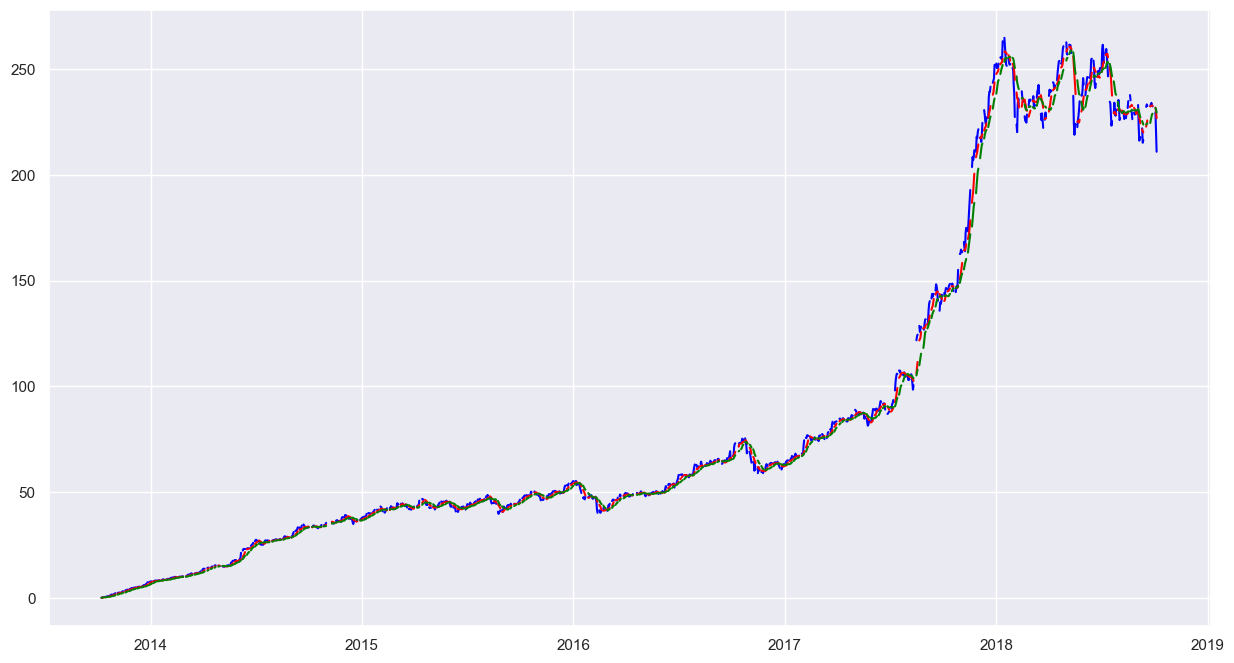

In [17]:
df_sma=df.copy()
df_sma['SMA_10']=df_sma.VWAP.rolling(10, min_periods=1).mean()
df_sma['SMA_20']=df_sma.VWAP.rolling(20, min_periods=1).mean()

plt.plot(df_sma['Date'], df_sma['VWAP'], color='blue')
plt.plot(df_sma['Date'],df_sma['SMA_10'], color='red')
plt.plot(df_sma['Date'],df_sma['SMA_20'], color='green')
plt.show()

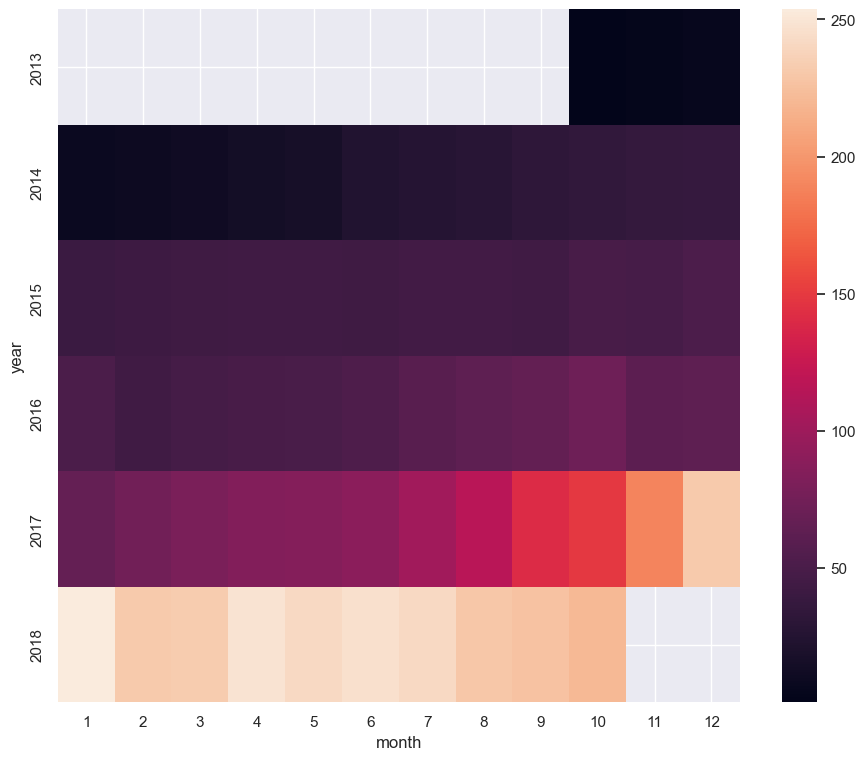

In [18]:
df_temp=df.copy()
df_temp['day'] = df_temp.index.day
df_temp['month'] = df_temp.index.month
df_temp['year'] = df_temp.index.year

df_m=df_temp.groupby(['month', 'year']).mean()
df_m
df_m=df_m.unstack(level=0)
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(df_m['VWAP'])
plt.show()